In [1]:
# In this script I want to solve the system of odes for assembling two 3-membered rings  
# with synthesis and degradation NOT included 
# Name: Leo Lagunes and Paige M.
# Date: 07/14/21 

# Last update: 09/21/21

# IMPORTANT NOTE: The equations were written and developed by Drs. Eric Deeds and Koan Briggs, this code was developed by LL + PM

#skip this cell if you've run it before
#import Pkg; Pkg.precompile()
#Pkg.add("Plots")
#using Pkg
#using Plots; gr()
#Pkg.add("DifferentialEquations")
#using DifferentialEquations

#println("Almost ready!")
#Pkg.update()
#ENV["GRDIR"]=""
#Pkg.build("GR")
#println("Ready bitch!")
#println("............")

In [63]:
# This cell contains all the functions + packages to run everything

#------------------------------------
#--- List of packages here ---
#------------------------------------
using DifferentialEquations
using Plots; gr()
# -----------------------------------
# --- Solve the system of ode's -----
# -----------------------------------
function StackedRings_sd(paramvaluesList)
    x0Val, kOn, δ, Q = paramvaluesList
    p = kOn, δ, Q
    keff(i,j)= c0^(-i-j+1)*kOn*(kd1)^i*(kd2)^j*ℯ^(-(i+j-1)*ΔGp/(Rconst*T))
    function TwoStackedRingsSystem!(dx, x, p, t)
        dx[1] = kOn*x[1]*(-6*x[1] -4*x[2] -3*x[3] - 3*x[4] -2*x[5] -3*x[6] -2*x[7] - 2*x[8] -3*x[9] -2*x[10]-x[11]) + 2*keff(0,1)*x[2] +2*keff(1,0)*x[3] + keff(1,0)*x[4] + keff(0,1)*x[4] + 2*keff(1,0)*x[5] + keff(1,0)*x[6] + keff(0,1)*x[6] + 2*keff(1,0)*x[7] + 4*keff(1,1)*x[8] + 3*keff(2,0)*x[9] + 2*keff(2,0)*x[10] + keff(0,1)*x[10] + 2*keff(2,1)*x[11] + keff(2,0)*x[11] + 2*keff(1,1)*x[11] + 6*keff(2,1)*x[12] - δ*x[1] + Q
        dx[2] = kOn*((x[1])^2-4*x[1]*x[2]-8*(x[2])^2 -2*x[2]*x[3]-2*x[2]*x[4]-2*x[2]*x[6]-2*x[2]*x[8]) - keff(0,1)*x[2]+keff(1,0)*x[4]+keff(1,0)*x[6]+2*keff(2,0)*x[8]+keff(2,0)*x[10]+2*keff(3,0)*x[11] + 3*keff(4,0)*x[12] -δ*x[2]
        dx[3] = kOn*(2*(x[1])^2 -3*x[1]*x[3] -2*x[2]*x[3] -6*(x[3])^2 -x[3]*x[4]-x[3]*x[6]-3*x[3]*x[9] - x[3]*x[10]) - keff(1,0)*x[3] + keff(0,1)*x[4]+2*keff(0,1)*x[5] + keff(0,1)*x[6]+2*keff(0,1)*x[7]+ 2*keff(0,2)*x[8] + 3*keff(2,0)*x[9]+keff(2,0)*x[10]+2*keff(2,1)*x[11] + keff(0,2)*x[11] + 6*keff(2,2)*x[12] - δ*x[3]
        dx[4] = kOn*(2*x[1]*x[2] + x[1]*x[3] - 3*x[1]*x[4]-2*x[2]*x[4] -x[3]*x[4]-2*(x[4])^2) - keff(1,0)*x[4] - keff(0,1)*x[4] + 2*keff(1,0)*x[5] +2*keff(1,1)*x[8]+ keff(2,0)*x[10] + keff(3,0)*x[11] + keff(2,1)*x[11] + 6*keff(4,1)*x[12] - δ*x[4]
        dx[5] = kOn*(x[1]*x[4]- 2*x[1]*x[5] + (x[3])^2) -2*keff(1,0)*x[5] -keff(0,1)*x[5] + keff(2,1)*x[11] - δ*x[5]
        dx[6] = kOn*(2*x[1]*x[2]+x[1]*x[3] -3*x[1]*x[6]-2*x[2]*x[6] - x[3]*x[6]-2*(x[6])^2)-keff(1,0)*x[6] - keff(0,1)*x[6] + 2*keff(1,0)*x[7] + 2*keff(1,1)*x[8] + keff(2,0)*x[10] + keff(3,0)*x[11] + keff(2,1)*x[11] + 6*keff(4,1)*x[12] - δ*x[6]
        dx[7] = kOn*(x[1]*x[6] -2*x[1]*x[7] + (x[3])^2) - 2*keff(1,0)*x[7] - keff(0,1)*x[7] + keff(2,1)*x[11] - δ*x[7]
        dx[8] = kOn*(x[1]*x[4] + x[1]*x[6] -2*x[1]*x[8]+4*(x[2])^2 - 2*x[2]*x[8] + (x[3])^2) - 4*keff(1,1)*x[8] - keff(2,0)*x[8] - keff(0,2)*x[8] + keff(2,0)*x[11] + 3*keff(4,0)*x[12] - δ*x[8]
        dx[9] = kOn*(x[1]*x[3] -3*x[1]*x[9] - 3*x[3]*x[9]-6*(x[9])^2) -3*keff(2,0)*x[9] + keff(0,1)*x[10] + keff(0,2)*x[11] + 2*keff(0,3)*x[12] - δ*x[9]
        dx[10] = kOn*(x[1]*x[4] + x[1]*x[6]+3*x[1]*x[9]-2*x[1]*x[10]+2*x[2]*x[3]-x[3]*x[10]) -3*keff(2,0)*x[10] -keff(0,1)*x[10]+2*keff(1,1)*x[11] +6*keff(2,2)*x[12] - δ*x[10]
        dx[11] = kOn*(2*x[1]*x[5] +2*x[1]*x[7] +2*x[1]*x[8] +2*x[1]*x[10]-x[1]*x[11]+2*x[2]*x[4]  + 2*x[2]*x[6] +x[3]*x[4] +x[3]*x[6]+3*x[3]*x[9]) -4*keff(2,1)*x[11] -keff(2,0)*x[11] -2*keff(1,1)*x[11] -2*keff(3,0)*x[11] -keff(0,2)*x[11] +6*keff(2,1)*x[12] - δ*x[11]
        dx[12] = kOn*(x[1]*x[11]+2*x[2]*x[8] +x[3]*x[10] +(x[4])^2 +(x[6])^2 +3*(x[9])^2) -6*keff(2,1)*x[12] -3*keff(4,0)*x[12]-6*keff(2,2)*x[12] -6*keff(4,1)*x[12] -keff(0,3)*x[12] -δ*x[12]
    end
    x0=[x0Val; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0]
    # --- parameter values ---
    # print parameter values 
    #println("kOn: ", kOn)
    #println("kd1: ", kd1)
    #println("kd2:", kd2)
    #println("delta: ", δ)
    #println("q: ", Q)
    #println("c0:", c0)


    # --- time span --- 
    #tspan = (0.000001, 10.0^9)
    tspan = (0.000001, 10.0^12)

    # --- ode solver --- 
    #println("---")
    #println("Solving - fixed parameter set...")
    prob = ODEProblem(TwoStackedRingsSystem!,x0,tspan,p)
    sol = solve(prob,Rosenbrock23(autodiff=false), abstol = 1e-12, reltol = 1e-12);
    # sol = solve(prob,TRBDF2());
    #println("Solved ")
    return sol
end

println("Solve Differential Equations: StackedRings_sd(paramvaluesList)")

# ---------------------------------------
# --- Solve the system of ode's NEW -----
# ---------------------------------------
function StackedRings_EJD(paramvaluesList)
    x0Val, kOn, δ, Q, kd1 = paramvaluesList
    p = kOn, δ, Q
    #keff(i,j)= c0^(-i-j+1)*kOn*(kd1)^i*(kd2)^j*ℯ^(-(i+j-1)*ΔGp/(Rconst*T))
    keff(i,j)= kOn*(kd1)^i*(kd2)^j*ℯ^(-(i+j-1)*9/0.6)
    function TwoStackedRingsSystem!(dx, x, p, t)
        dx[1] = - 2*kOn*0.5*x[1]*x[1] + 1*keff(1,0)*x[2] - 2*kOn*0.5*x[1]*x[1] + 1*keff(1,0)*x[2] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[3] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[3] - 1*kOn*1*x[1]*x[2] + 3*keff(2,0)*x[4] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[5] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[6] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[6] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[5] - 3*kOn*1*x[1]*x[4] + 1*keff(0,1)*x[7] - 1*kOn*1*x[1]*x[5] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[5] + 2*keff(1,0)*x[8] - 1*kOn*1*x[1]*x[5] + 2*keff(1,1)*x[9] - 1*kOn*1*x[1]*x[6] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[6] + 2*keff(1,1)*x[9] - 1*kOn*1*x[1]*x[6] + 2*keff(1,0)*x[10] - 2*kOn*1*x[1]*x[7] + 2*keff(1,1)*x[11] - 2*kOn*1*x[1]*x[8] + 1*keff(2,1)*x[11] - 2*kOn*1*x[1]*x[9] + 1*keff(2,0)*x[11] - 2*kOn*1*x[1]*x[10] + 1*keff(2,1)*x[11] - 1*kOn*1*x[1]*x[11] + 6*keff(2,1)*x[12]   
        dx[2] = + 2*kOn*0.5*x[1]*x[1] - 1*keff(1,0)*x[2] - 1*kOn*1*x[1]*x[2] + 3*keff(2,0)*x[4] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[5] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[6] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,2)*x[9] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,2)*x[9] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[10] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[10] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[8] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[8] - 2*kOn*1*x[2]*x[3] + 1*keff(2,0)*x[7] - 3*kOn*1*x[2]*x[4] + 1*keff(0,2)*x[11] - 1*kOn*1*x[2]*x[5] + 1*keff(2,1)*x[11] - 1*kOn*1*x[2]*x[6] + 1*keff(2,1)*x[11] - 1*kOn*1*x[2]*x[7] + 6*keff(2,2)*x[12]
        dx[3] = + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[3] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[6] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[5] - 2*kOn*1*x[2]*x[3] + 1*keff(2,0)*x[7] - 4*kOn*0.5*x[3]*x[3] + 1*keff(2,0)*x[9] - 4*kOn*0.5*x[3]*x[3] + 1*keff(2,0)*x[9] - 2*kOn*1*x[3]*x[5] + 1*keff(3,0)*x[11] - 2*kOn*1*x[3]*x[6] + 1*keff(3,0)*x[11] - 2*kOn*1*x[3]*x[9] + 3*keff(4,0)*x[12]  
        dx[4] = + 1*kOn*1*x[1]*x[2] - 3*keff(2,0)*x[4] - 3*kOn*1*x[1]*x[4] + 1*keff(0,1)*x[7] - 3*kOn*1*x[2]*x[4] + 1*keff(0,2)*x[11] - 3*kOn*0.5*x[4]*x[4] + 1*keff(0,3)*x[12] - 3*kOn*0.5*x[4]*x[4] + 1*keff(0,3)*x[12]  
        dx[5] = + 1*kOn*1*x[1]*x[2] - 1*keff(0,1)*x[5] + 2*kOn*1*x[1]*x[3] - 1*keff(1,0)*x[5] - 1*kOn*1*x[1]*x[5] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[5] + 2*keff(1,0)*x[8] - 1*kOn*1*x[1]*x[5] + 2*keff(1,1)*x[9] - 1*kOn*1*x[2]*x[5] + 1*keff(2,1)*x[11] - 2*kOn*1*x[3]*x[5] + 1*keff(3,0)*x[11] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[12] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[12]    
        dx[6] = + 1*kOn*1*x[1]*x[2] - 1*keff(0,1)*x[6] + 2*kOn*1*x[1]*x[3] - 1*keff(1,0)*x[6] - 1*kOn*1*x[1]*x[6] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[6] + 2*keff(1,1)*x[9] - 1*kOn*1*x[1]*x[6] + 2*keff(1,0)*x[10] - 1*kOn*1*x[2]*x[6] + 1*keff(2,1)*x[11] - 2*kOn*1*x[3]*x[6] + 1*keff(3,0)*x[11] - 1*kOn*0.5*x[6]*x[6] + 3*keff(4,1)*x[12] - 1*kOn*0.5*x[6]*x[6] + 3*keff(4,1)*x[12]     
        dx[7] = + 3*kOn*1*x[1]*x[4] - 1*keff(0,1)*x[7] + 1*kOn*1*x[1]*x[5] - 1*keff(2,0)*x[7] + 1*kOn*1*x[1]*x[6] - 1*keff(2,0)*x[7] - 2*kOn*1*x[1]*x[7] + 2*keff(1,1)*x[11] + 2*kOn*1*x[2]*x[3] - 1*keff(2,0)*x[7] - 1*kOn*1*x[2]*x[7] + 6*keff(2,2)*x[12]  
        dx[8] = + 1*kOn*1*x[1]*x[5] - 2*keff(1,0)*x[8] - 2*kOn*1*x[1]*x[8] + 1*keff(2,1)*x[11] + 1*kOn*0.5*x[2]*x[2] - 1*keff(0,1)*x[8]  
        dx[9] = + 1*kOn*1*x[1]*x[5] - 2*keff(1,1)*x[9] + 1*kOn*1*x[1]*x[6] - 2*keff(1,1)*x[9] - 2*kOn*1*x[1]*x[9] + 1*keff(2,0)*x[11] + 1*kOn*0.5*x[2]*x[2] - 1*keff(0,2)*x[9] + 4*kOn*0.5*x[3]*x[3] - 1*keff(2,0)*x[9] - 2*kOn*1*x[3]*x[9] + 3*keff(4,0)*x[12]   
        dx[10] = + 1*kOn*1*x[1]*x[6] - 2*keff(1,0)*x[10] - 2*kOn*1*x[1]*x[10] + 1*keff(2,1)*x[11] + 1*kOn*0.5*x[2]*x[2] - 1*keff(0,1)*x[10]  
        dx[11] = + 2*kOn*1*x[1]*x[7] - 2*keff(1,1)*x[11] + 2*kOn*1*x[1]*x[8] - 1*keff(2,1)*x[11] + 2*kOn*1*x[1]*x[9] - 1*keff(2,0)*x[11] + 2*kOn*1*x[1]*x[10] - 1*keff(2,1)*x[11] - 1*kOn*1*x[1]*x[11] + 6*keff(2,1)*x[12] + 3*kOn*1*x[2]*x[4] - 1*keff(0,2)*x[11] + 1*kOn*1*x[2]*x[5] - 1*keff(2,1)*x[11] + 1*kOn*1*x[2]*x[6] - 1*keff(2,1)*x[11] + 2*kOn*1*x[3]*x[5] - 1*keff(3,0)*x[11] + 2*kOn*1*x[3]*x[6] - 1*keff(3,0)*x[11]  
        dx[12] = 1*kOn*1*x[1]*x[11] - 6*keff(2,1)*x[12] + 1*kOn*1*x[2]*x[7] - 6*keff(2,2)*x[12] + 2*kOn*1*x[3]*x[9] - 3*keff(4,0)*x[12] + 3*kOn*0.5*x[4]*x[4] - 1*keff(0,3)*x[12] + 1*kOn*0.5*x[5]*x[5] - 3*keff(4,1)*x[12] + 1*kOn*0.5*x[6]*x[6] - 3*keff(4,1)*x[12]
    end
    x0=[x0Val; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0]

    # --- time span --- 
    #tspan = (0.000001, 10.0^9)
    #tspan = (0.000001, 10.0^12)
    tspan = (0.000001, 86400)

    # --- ode solver --- 
    #println("---")
    #println("Solving - fixed parameter set...")
    prob = ODEProblem(TwoStackedRingsSystem!,x0,tspan,p)
    sol = solve(prob,Rosenbrock23(autodiff=false), abstol = 1e-12, reltol = 1e-12);
    # sol = solve(prob,TRBDF2());
    #println("Solved ")
    return sol
end

println("Solve Differential Equations: StackedRings_EJD(paramvaluesList)")
#-----------------------
# --- Assembly Yeild ---
#-----------------------
function assemblyYield(solRaw)
    # this function will return the assembly yield value at the last time point 
    # Yn = n*Xn/XT
    #print(sol.u)
    Yn = 0 
    sol=solRaw
    n=12; #XN = sol(end,:); println(XN)
    listSol=[t.+2u for (u,t) in zip(sol.u,sol.t)];
    # This will give the concentratiions of each species at time point 0.01 
    #sol(0.01)
    tEnd = 10^6; t0 = 0.0
    #print(solRaw)
     # NEED THE AY AFTER 24HRS = 86400 seconds!!!!
    timePts = solRaw.t; totPts = length(timePts);
    allSols = solRaw.u; #print(allSols)
    slntEnd_pre = allSols[totPts,:]; slntEnd = slntEnd_pre[1]
    # --- calculate Xn = X12 ---
    nSpec = length(slntEnd); 
    Xn = slntEnd[nSpec]
    # --- calculate XT --- 
    cnt = 1; XT = 0
    for it in slntEnd
        addIt = cnt*it
        XT += addIt
        cnt += 1
    end
    # --- calculate Yn ---
    Yn = n*Xn/XT;
    
    return Yn
    
end

println("get AY w/ last time point: assemblyYield(solRaw)")
#-----------------------------------
# --- Assembly Yeild after 24 hrs---
#-----------------------------------
function assemblyYield_24hrs(solRaw)
    # this function will return the assembly yield value after 24hrs! 
    # Yn = n*Xn/XT
    #print(sol.u)
    Yn = 0 
    sol=solRaw
    n=12; #XN = sol(end,:); println(XN)
    listSol=[t.+2u for (u,t) in zip(sol.u,sol.t)];
    # --- take the concentrations at the end of 24hrs = 86400 sec ---
    t24 = sol(86400); # print(t24)
    # This will give the concentratiions of each species at time point 0.01 
    #sol(0.01)
    tEnd = 10^6; t0 = 0.0
    #print(solRaw)
     # NEED THE AY AFTER 24HRS = 86400 seconds!!!!
    allSols = t24; #print(allSols)
    slntEnd=allSols;
    #slntEnd_pre = allSols[totPts,:]; slntEnd = slntEnd_pre[1]
    # --- calculate Xn = X12 ---
    nSpec = length(allSols); #print("species: ", nSpec)
    Xn = allSols[nSpec]; #print("X12: ", Xn)
    # --- calculate XT --- 
    # define XT as the IC of monomers (predefined - compare them-maybe Xn)
    XT = x0Val; # print(XT)
    #cnt = 1; XT = 0
    #for it in slntEnd
    #    addIt = cnt*it
    #    XT += addIt
    #    cnt += 1
    #end
    # --- calculate Yn ---
    Yn = n*Xn/XT;
    
    return Yn
    
end
println("get AY after 24hrs: assemblyYield_24hrs(solRaw)")
#-----------------------------
# --- plot the time course ---
#-----------------------------
function plotTimeCourse(sol,AY)
    # sol = stackedRings_sd(paramvaluesList)
    # This function will plot the time course for the solved odes and label the AY at the last time point
    AYrnd = round(AY,digits=5)
    p1=plot(sol,linewidth=2,title="Stacked rings + synth/deg with AY= $AYrnd",xaxis = ("Time (t)",:log ),
         yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false
    # add a line at 1
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p1)
    println("Plot done!")

    # sol.t[end],sol[end]
    println("Saving file...")
    #savefig("C:\\plot_2SR_0720_001.png")
    println("Figure saved")
    
end 

println("to get time course: plotTimeCourse(sol, AY)")

#-----------------------
# --- AY time course ---
#-----------------------

function AYtimeCourse(solRaw)
    #This function will return the Assembly yield for every time point in a time course for the last species x12
    # --- empty list/initialization --- #
    list_AY=[]
    Yn = 0 
    sol=solRaw
    n=12; #XN = sol(end,:); println(XN)
    listSol=[t.+2u for (u,t) in zip(sol.u,sol.t)];
    # This will give the concentratiions of each species at time point 0.01 
    #sol(0.01)
    tEnd = 10^6; t0 = 0.0
    #print(solRaw)
    timePts = solRaw.t; totPts = length(timePts); # print("total time points: ", totPts)
    allSols = solRaw.u; #print(allSols)
    for tp_i = 1:totPts
        #println("item in loop: ")
        # print("time: ", tp_i, "\n")
        #print(tp_i)
        # slntEnd_pre = allSols[totPts,:]; slntEnd = slntEnd_pre[1]
        # NEED THE AY AFTER 24HRS = 86400 seconds! 
        slntEnd_pre = allSols[tp_i,:]; #slntEnd = slntEnd_pre[1]
        slntEnd = slntEnd_pre[1]
        # --- calculate Xn = X12 ---
        nSpec = length(slntEnd); 
        Xn = slntEnd[nSpec]
        # --- calculate XT --- 
        cnt = 1; XT = 0
        for it in slntEnd
            addIt = cnt*it
            XT += addIt
            cnt += 1
        end
        # --- calculate Yn ---
        Yn = n*Xn/XT; # add this to the AY list
        # print("AY at ti= ", Yn)
        push!(list_AY, Yn)
    end 
    # print("all tps: ", timePts)
    return list_AY, timePts   
end

println("AY Time course: AYtimecourse(solRaw)")

#----------------------------
# --- plot AY time course ---
#----------------------------
function plotAYtimeCourse(list_AY, timePts)
    # print("total pts: ", length(timePts), "\n")
    #print("--")
    # this function will plot the AY time course give the AY list and the time points 
    p2=plot(timePts,list_AY,linewidth=2,title="Stacked rings Assembly Yield + NO synth/deg",xaxis = ("Time (t)",:log ),
         yaxis="AY(t)", label = ["x12"], legend=:bottomright ) # legend=false
    # add a vertical line at 24hrs mark
    plot!([86400, 86400], [0, 1])
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p2)
    println("Plot done!")

    # sol.t[end],sol[end]
    #println("Saving file...")
    #savefig("C:\\plot_2SR_0816_AY_001.png")
    #println("Figure saved")
    return p2
    
end 

println("to plot time course: plotAYtimeCourse(list_AY, timePts)")

#----------------------------
# --- calculate AY vs IC  ---
#----------------------------
function calcAYvsIC(nICpts,minDeg, maxDeg)
    # this function will calculate AY for different initial condition values at each time point but only for the x12 species 
    # nICpts = number of initial condition points to consider
    mags = LinRange(minDeg, maxDeg,nICpts)
    allICs = 10 .^mags
    # allICs = [10^-8, 10^-5, 10^-3]

    # initialize lists to store
    AY_list = []; solsList = []
    # loop to solve AY for each IC 
    for icVal in allICs # loop through all the IC values
        #x0Val=10^-4; 
        x0Val=icVal; #print(x0Val)
        # solve the system
        paramvaluesList= x0Val, kOn, δ, Q, kd1
        # sol = StackedRings_sd(paramvaluesList);
        sol = StackedRings_EJD(paramvaluesList);
        # calculate AY 
        ayVali = assemblyYield_24hrs(sol); #print(ayVali)
        # store value of AY 
        push!(AY_list, ayVali)
    end 
    
    return allICs, AY_list
    
end 
println("to calculate AY vs IC: calcAYvsIC(nICpts)")

#----------------------------
# --- plot AY vs IC curve ---
#----------------------------
function plotAYvsIC_curve(allICs, AY_list)
    # This function will plot the AY for increasing Initial Conditions 
    p3=plot(allICs,AY_list,linewidth=2, linecolor=:red,title="Stacked rings Assembly Yield vs Initial Conditions",xaxis = ("Initial Concentration (M)",:log ),
         yaxis="Assembly Yield",legend=false ) # legend=false
    # add a line at 1
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p3)
    println("Plot done!")

    # sol.t[end],sol[end]
    #println("Saving file...")
    #savefig("C:\\plot_ICvsAY_0824.png")
    #println("Figure saved")
end 
# println("to plot AY vs IC: plotAYvsIC_curve(allICs, AY_list)")
println("to plot AY vs IC: plotAYvsIC_curve(allICs, AY_list)")

Solve Differential Equations: StackedRings_sd(paramvaluesList)
Solve Differential Equations: StackedRings_EJD(paramvaluesList)
get AY w/ last time point: assemblyYield(solRaw)
get AY after 24hrs: assemblyYield_24hrs(solRaw)
to get time course: plotTimeCourse(sol, AY)
AY Time course: AYtimecourse(solRaw)
to plot time course: plotAYtimeCourse(list_AY, timePts)
to calculate AY vs IC: calcAYvsIC(nICpts)
to plot AY vs IC: plotAYvsIC_curve(allICs, AY_list)


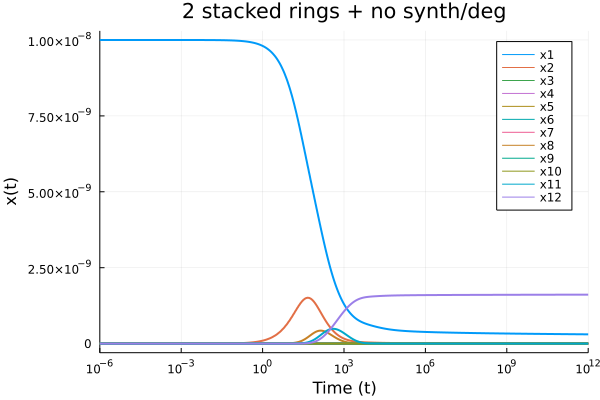

Plot done!
Saving file...
Figure saved


In [3]:
#-------------------------------
# --- parameter values here ---
#-------------------------------
c0=1 # 1M
kd1 = 10^-3 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-8 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-8; # x0 M
paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2

#---------------------------------
# --- solve fixed parameter ex ---
#---------------------------------
sol = StackedRings_sd(paramvaluesList)

p1=plot(sol,linewidth=2,title="2 stacked rings + no synth/deg",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false
# add a line at 1
# hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
display(p1)
println("Plot done!")

# sol.t[end],sol[end]
println("Saving file...")
#savefig("C:\\plot_2SR_0715_003.png")
println("Figure saved")

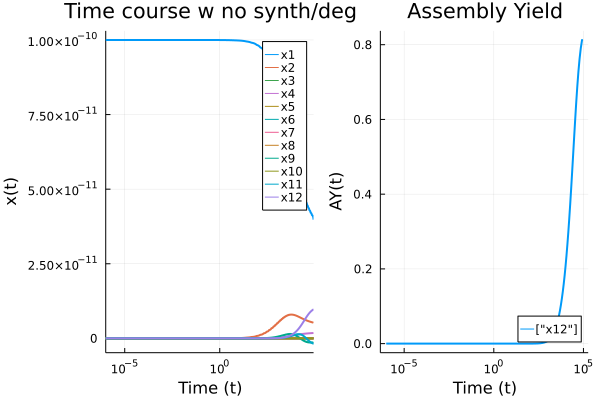

Plot done!


In [4]:
# LL - new equations from EJD

#-------------------------------
# --- parameter values here ---
#-------------------------------
c0=1 # 1M
kd1 = 10^-12 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-3 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 

#x0Val=10^-8; # x0 M
x0Val=10^-10
paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2

#---------------------------------
# --- solve fixed parameter ex ---
#---------------------------------
sol = StackedRings_EJD(paramvaluesList)
p1=plot(sol,linewidth=2,title="Time course w no synth/deg",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false

aytc_01 = AYtimeCourse(sol);
list_AY=aytc_01[1]; timePts=aytc_01[2]
p2=plot(timePts,list_AY,linewidth=2,title="Assembly Yield",xaxis = ("Time (t)",:log ),
         yaxis="AY(t)", label = ["x12"], legend=:bottomright )

# --- plot AY time course as well --- 
p3=plot(p1,p2, layout=2)
display(p3)
println("Plot done!")

In [ ]:
#-------------------------------
# --- AY time course curve -----
#-------------------------------
c0=1
kd1 = 10^-8 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-8 #between ring (intra)
ΔGp = 9
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
#--- initial condition ---
#tic() # check time elapsed
x0Val=10^-4; kOn = 10^6 #tolerances set to 10^-12 in stacked ring solver, cusp behavoir around x0val~ big
paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
sol = StackedRings_sd(paramvaluesList)

aytc_01 = AYtimeCourse(sol);
list_AY=aytc_01[1]; timePts=aytc_01[2]
plotAYtimeCourse(list_AY, timePts)
#toc()



prevec: [[4.0000000000000015e-6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
Sln: [4.0000000000000015e-6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-----
prevec: [[3.999934829136067e-6, 2.1728261355584023e-11, 1.0856728289882467e-11, 5.901547720235299e-17, 1.1793129668949138e-16, 1.1793129668949138e-16, 1.0888032780261593e-21, 3.264609611834606e-22, 6.522560096993033e-22, 3.26460961183452e-22, 7.364867074743387e-25, 5.067576284402168e-25]]
Sln: [3.999934829136067e-6, 2.1728261355584023e-11, 1.0856728289882467e-11, 5.901547720235299e-17, 1.1793129668949138e-16, 1.1793129668949138e-16, 1.0888032780261593e-21, 3.264609611834606e-22, 6.522560096993033e-22, 3.26460961183452e-22, 7.364867074743387e-25, 5.067576284402168e-25]
-----
prevec: [[3.999284817084367e-6, 2.3895270794279573e-10, 1.185855816545326e-10, 7.138425376240208e-15, 1.4151453561483314e-14, 1.4151453561483316e-14, 1.3941464359737488e-18, 4.280004272835468e-19, 8.585525542867819e-19, 4.280004272835468e-1

prevec: [[3.923670388878889e-6, 3.1001962011051976e-8, 6.657149825572168e-9, 1.2247397414886257e-10, 1.0519634567217305e-10, 1.0519634567217305e-10, 1.247088887002514e-12, 4.150280263388092e-13, 1.0872603640951235e-12, 4.150280263388092e-13, 2.5858976793714152e-14, 8.921460859508736e-17]]
Sln: [3.923670388878889e-6, 3.1001962011051976e-8, 6.657149825572168e-9, 1.2247397414886257e-10, 1.0519634567217305e-10, 1.0519634567217305e-10, 1.247088887002514e-12, 4.150280263388092e-13, 1.0872603640951235e-12, 4.150280263388092e-13, 2.5858976793714152e-14, 8.921460859508736e-17]
-----
prevec: [[3.915963959391625e-6, 3.4568477890303055e-8, 6.849582473579949e-9, 1.5257268945865272e-10, 1.2092968134361138e-10, 1.2092968134361138e-10, 1.6015939861446148e-12, 5.330542723220705e-13, 1.4403438457376254e-12, 5.330542723220705e-13, 3.813485478929766e-14, 1.4406578549427952e-16]]
Sln: [3.915963959391625e-6, 3.4568477890303055e-8, 6.849582473579949e-9, 1.5257268945865272e-10, 1.2092968134361138e-10, 1.20929

prevec: [[3.4623591145070015e-6, 2.4621371355758517e-7, 5.993940782932065e-9, 8.733411205127117e-9, 8.529491068017079e-10, 8.529491068017079e-10, 9.083091091722922e-11, 3.0250706882033556e-11, 2.587587286247991e-10, 3.0250706882033556e-11, 5.181331496864775e-11, 1.3696279513526662e-12]]
Sln: [3.4623591145070015e-6, 2.4621371355758517e-7, 5.993940782932065e-9, 8.733411205127117e-9, 8.529491068017079e-10, 8.529491068017079e-10, 9.083091091722922e-11, 3.0250706882033556e-11, 2.587587286247991e-10, 3.0250706882033556e-11, 5.181331496864775e-11, 1.3696279513526662e-12]
-----
prevec: [[3.403187463033867e-6, 2.7227270102521616e-7, 5.790803654712815e-9, 1.0859090547840873e-8, 9.271209891132286e-10, 9.271209891132286e-10, 1.1101555930633865e-10, 3.701034324507119e-11, 3.4962078585419577e-10, 3.701034324507119e-11, 7.858862686263477e-11, 2.32646119338993e-12]]
Sln: [3.403187463033867e-6, 2.7227270102521616e-7, 5.790803654712815e-9, 1.0859090547840873e-8, 9.271209891132286e-10, 9.271209891132286e

prevec: [[2.41702579821612e-6, 6.339671528211757e-7, 2.9209954377770333e-9, 8.094321651311193e-8, 1.5338120593911874e-9, 1.5338120593911874e-9, 5.883097077718091e-10, 2.0126586903413152e-10, 6.6345831886821325e-9, 2.0126586903413152e-10, 4.795924928451578e-9, 4.4734336499140717e-10]]
Sln: [2.41702579821612e-6, 6.339671528211757e-7, 2.9209954377770333e-9, 8.094321651311193e-8, 1.5338120593911874e-9, 1.5338120593911874e-9, 5.883097077718091e-10, 2.0126586903413152e-10, 6.6345831886821325e-9, 2.0126586903413152e-10, 4.795924928451578e-9, 4.4734336499140717e-10]
-----
prevec: [[2.3642219131541883e-6, 6.485553237302469e-7, 2.794768263902405e-9, 8.641188584757877e-8, 1.534869337575173e-9, 1.534869337575173e-9, 6.1436927630443e-10, 2.106525487533151e-10, 7.360448149313125e-9, 2.106525487533151e-10, 5.559816861264385e-9, 5.415758150851403e-10]]
Sln: [2.3642219131541883e-6, 6.485553237302469e-7, 2.794768263902405e-9, 8.641188584757877e-8, 1.534869337575173e-9, 1.534869337575173e-9, 6.1436927630

Sln: [1.5742044163967748e-6, 7.790718872198637e-7, 1.2391787972859274e-9, 1.7794694986429998e-7, 1.2281442006918048e-9, 1.2281442006918048e-9, 8.429361147269214e-10, 3.0426573023301365e-10, 2.62757512295496e-8, 3.0426573023301365e-10, 3.528804437874067e-8, 6.102439943200912e-9]
-----
prevec: [[1.5342248996461943e-6, 7.802095709259162e-7, 1.177047677146224e-9, 1.824300153807099e-7, 1.1987216960163936e-9, 1.1987216960163936e-9, 8.422403801582182e-10, 3.051654470079652e-10, 2.7718340964361793e-8, 3.051654470079652e-10, 3.8219845870609693e-8, 6.789434753710715e-9]]
Sln: [1.5342248996461943e-6, 7.802095709259162e-7, 1.177047677146224e-9, 1.824300153807099e-7, 1.1987216960163936e-9, 1.1987216960163936e-9, 8.422403801582182e-10, 3.051654470079652e-10, 2.7718340964361793e-8, 3.051654470079652e-10, 3.8219845870609693e-8, 6.789434753710715e-9]
-----
prevec: [[1.4949705644722906e-6, 7.806906740053012e-7, 1.1175984307269795e-9, 1.8673214480967917e-7, 1.1687904297264997e-9, 1.1687904297264997e-9, 8

Sln: [9.596725662149368e-7, 7.13206682981169e-7, 4.6064833308620695e-10, 2.256127894038287e-7, 6.855101137378661e-10, 6.855101137378661e-10, 6.515193539564539e-10, 2.55052403331476e-10, 5.436131157424608e-8, 2.55052403331476e-10, 1.0809337123101406e-7, 2.8247123861351785e-8]
-----
prevec: [[9.31453738581079e-7, 7.052066588684465e-7, 4.3396475191714884e-10, 2.2602509835830867e-7, 6.578885608772181e-10, 6.578885608772181e-10, 6.335053975968065e-10, 2.4936051790307765e-10, 5.592959007777569e-8, 2.4936051790307765e-10, 1.1319963197727266e-7, 3.016616030115499e-8]]
Sln: [9.31453738581079e-7, 7.052066588684465e-7, 4.3396475191714884e-10, 2.2602509835830867e-7, 6.578885608772181e-10, 6.578885608772181e-10, 6.335053975968065e-10, 2.4936051790307765e-10, 5.592959007777569e-8, 2.4936051790307765e-10, 1.1319963197727266e-7, 3.016616030115499e-8]
-----
prevec: [[9.03771248697914e-7, 6.968646496046915e-7, 4.0856179086473776e-10, 2.262011703306361e-7, 6.307836087321868e-10, 6.307836087321868e-10, 6.

Sln: [5.234722454922867e-7, 5.281870862252295e-7, 1.371313930213601e-10, 1.995996814454146e-7, 2.7686927701829714e-10, 2.768692770182972e-10, 3.142267774628242e-10, 1.3983535769082214e-10, 7.948806608264259e-8, 1.3983535769082214e-10, 2.0903657031652456e-7, 7.565139223138174e-8]
-----
prevec: [[5.031265900901408e-7, 5.160962731479982e-7, 1.2668480762511583e-10, 1.9632020196158538e-7, 2.600115116893012e-10, 2.6001151168930115e-10, 2.970381020957067e-10, 1.3350312205215096e-10, 8.061059689774756e-8, 1.3350312205215096e-10, 2.1490496225985854e-7, 7.911390712810686e-8]]
Sln: [5.031265900901408e-7, 5.160962731479982e-7, 1.2668480762511583e-10, 1.9632020196158538e-7, 2.600115116893012e-10, 2.6001151168930115e-10, 2.970381020957067e-10, 1.3350312205215096e-10, 8.061059689774756e-8, 1.3350312205215096e-10, 2.1490496225985854e-7, 7.911390712810686e-8]
-----
prevec: [[4.831579537978203e-7, 5.039052958427165e-7, 1.168342478610883e-10, 1.928848229648901e-7, 2.4378865586820463e-10, 2.43788655868204

Sln: [1.672887540809537e-7, 2.6470695818907535e-7, 1.40435380523258e-11, 1.0554136581054727e-7, 4.4318797293047174e-11, 4.431879729304717e-11, 5.303802602461407e-11, 3.5111484011395886e-11, 9.428132463193132e-8, 3.511148401139588e-11, 3.2210007816579735e-7, 1.6637674981941544e-7]
-----
prevec: [[1.5751111449579552e-7, 2.5568994989616394e-7, 1.2453330367111229e-11, 1.01658089318075e-7, 4.030614189602951e-11, 4.03061418960295e-11, 4.8098548255803985e-11, 3.2760598150852484e-11, 9.445764548002005e-8, 3.276059815085248e-11, 3.2533948331588686e-7, 1.7014758279463336e-7]]
Sln: [1.5751111449579552e-7, 2.5568994989616394e-7, 1.2453330367111229e-11, 1.01658089318075e-7, 4.030614189602951e-11, 4.03061418960295e-11, 4.8098548255803985e-11, 3.2760598150852484e-11, 9.445764548002005e-8, 3.276059815085248e-11, 3.2533948331588686e-7, 1.7014758279463336e-7]
-----
prevec: [[1.4816072292952845e-7, 2.469462378611417e-7, 1.102202513902473e-11, 9.785849570929345e-8, 3.6616135514266074e-11, 3.66161355142660

prevec: [[4.66044489366759e-8, 1.4067443395550945e-7, 1.1065165430327163e-12, 4.9181097527440465e-8, 6.559092165881594e-12, 6.559092165881594e-12, 6.880321786235333e-12, 9.923501199558004e-12, 9.590727614215397e-8, 9.923501199558004e-12, 3.6207494462169995e-7, 2.217251810016748e-7]]
Sln: [4.66044489366759e-8, 1.4067443395550945e-7, 1.1065165430327163e-12, 4.9181097527440465e-8, 6.559092165881594e-12, 6.559092165881594e-12, 6.880321786235333e-12, 9.923501199558004e-12, 9.590727614215397e-8, 9.923501199558004e-12, 3.6207494462169995e-7, 2.217251810016748e-7]
-----
prevec: [[4.2704300113044e-8, 1.358495627994536e-7, 9.312200834957701e-13, 4.687290622523546e-8, 5.8039418738871136e-12, 5.8039418738871136e-12, 6.008407109073496e-12, 9.255109970721845e-12, 9.601783227878696e-8, 9.255109970721845e-12, 3.634487108494464e-7, 2.239213686083923e-7]]
Sln: [4.2704300113044e-8, 1.358495627994536e-7, 9.312200834957701e-13, 4.687290622523546e-8, 5.8039418738871136e-12, 5.8039418738871136e-12, 6.0084071

prevec: [[5.569478965653753e-9, 7.605752559011201e-8, 2.0815144561174257e-14, 1.8256745972252128e-8, 4.2362630196239343e-13, 4.236263019623937e-13, 3.0492367852315027e-13, 2.9064437288656626e-12, 1.0059081638662942e-7, 2.906443728865663e-12, 3.806350089649621e-7, 2.4699664448889935e-7]]
Sln: [5.569478965653753e-9, 7.605752559011201e-8, 2.0815144561174257e-14, 1.8256745972252128e-8, 4.2362630196239343e-13, 4.236263019623937e-13, 3.0492367852315027e-13, 2.9064437288656626e-12, 1.0059081638662942e-7, 2.906443728865663e-12, 3.806350089649621e-7, 2.4699664448889935e-7]
-----
prevec: [[4.689548792755209e-9, 7.350825229808228e-8, 1.5752054883695263e-14, 1.7094431036406716e-8, 3.4472887996935245e-13, 3.4472887996935255e-13, 2.4037955619241e-13, 2.7153798726960645e-12, 1.0104428499141949e-7, 2.715379872696065e-12, 3.814184202406237e-7, 2.476194379830787e-7]]
Sln: [4.689548792755209e-9, 7.350825229808228e-8, 1.5752054883695263e-14, 1.7094431036406716e-8, 3.4472887996935245e-13, 3.447288799693525

Sln: [1.0932978951288904e-13, 2.653457409875871e-8, 6.922097652277624e-19, 1.4803889671174497e-9, 2.9108813558896455e-18, 2.910881355889646e-18, 4.900026059046919e-19, 3.619190026672471e-13, 1.1592736734753731e-7, 3.6191900266724713e-13, 3.9399445761211394e-7, 2.514674871246325e-7]
-----
prevec: [[8.364120999747467e-14, 2.4761238267336213e-8, 1.9674585578373568e-19, 1.2255202416764699e-9, 2.0736410389236577e-18, 2.0736410389236585e-18, 3.083634729079372e-19, 3.1616419497549694e-13, 1.1669307501140226e-7, 3.16164194975497e-13, 3.9423635642583303e-7, 2.5147404459944825e-7]]
Sln: [8.364120999747467e-14, 2.4761238267336213e-8, 1.9674585578373568e-19, 1.2255202416764699e-9, 2.0736410389236577e-18, 2.0736410389236585e-18, 3.083634729079372e-19, 3.1616419497549694e-13, 1.1669307501140226e-7, 3.16164194975497e-13, 3.9423635642583303e-7, 2.5147404459944825e-7]
-----
prevec: [[7.419690771901936e-14, 2.303692364806007e-8, 6.284203833685949e-20, 1.0041983080223179e-9, 1.7093787227697217e-18, 1.709

Sln: [1.6369969822196883e-14, 5.2979325555588586e-9, 5.847088797586638e-21, 1.9189929279584787e-11, 8.664948678749079e-20, 8.664948678749077e-20, 9.39893041911922e-22, 1.6042517809894027e-14, 1.2583795412963126e-7, 1.6042517809894024e-14, 3.954066194531429e-7, 2.5149358443436005e-7]
-----
prevec: [[1.5222263448216832e-14, 4.929380752777164e-9, 5.214160299709243e-21, 1.6998508066319226e-11, 7.497298853005647e-20, 7.497298853005653e-20, 7.746265663310156e-22, 1.3946870229846723e-14, 1.2602103599496686e-7, 1.394687022984672e-14, 3.9540879894281316e-7, 2.5149366291310483e-7]]
Sln: [1.5222263448216832e-14, 4.929380752777164e-9, 5.214160299709243e-21, 1.6998508066319226e-11, 7.497298853005647e-20, 7.497298853005653e-20, 7.746265663310156e-22, 1.3946870229846723e-14, 1.2602103599496686e-7, 1.394687022984672e-14, 3.9540879894281316e-7, 2.5149366291310483e-7]
-----
prevec: [[1.4185669393944563e-14, 4.596122036996085e-9, 4.663720880199906e-21, 1.53859090635501e-11, 6.514708253889712e-20, 6.51470

prevec: [[5.548468814407836e-15, 1.8055361184294682e-9, 1.0988418685691062e-21, 1.7080835824684163e-11, 1.0013761227855819e-20, 1.0013761227855814e-20, 2.848187016982393e-22, 2.026340437585864e-15, 1.2758194044158562e-7, 2.026340437585864e-15, 3.9540781220122985e-7, 2.5149514012065407e-7]]
Sln: [5.548468814407836e-15, 1.8055361184294682e-9, 1.0988418685691062e-21, 1.7080835824684163e-11, 1.0013761227855819e-20, 1.0013761227855814e-20, 2.848187016982393e-22, 2.026340437585864e-15, 1.2758194044158562e-7, 2.026340437585864e-15, 3.9540781220122985e-7, 2.5149514012065407e-7]
-----
prevec: [[5.2774701260402426e-15, 1.717583687699464e-9, 1.0155761272881929e-21, 1.784132575523225e-11, 9.060838290588493e-21, 9.060838290588489e-21, 2.829722940429765e-22, 1.842135129866132e-15, 1.276262757789922e-7, 1.842135129866132e-15, 3.9540693780903904e-7, 2.5149524941192797e-7]]
Sln: [5.2774701260402426e-15, 1.717583687699464e-9, 1.0155761272881929e-21, 1.784132575523225e-11, 9.060838290588493e-21, 9.060838

prevec: [[2.036904085548032e-15, 6.640166118247609e-10, 1.8291817885516053e-22, 4.432021988146688e-11, 1.3524956297775885e-21, 1.3524956297775913e-21, 2.712333749552867e-22, 2.894467625337947e-16, 1.2816904424009614e-7, 2.894467625337946e-16, 3.953716637911761e-7, 2.515007509746598e-7]]
Sln: [2.036904085548032e-15, 6.640166118247609e-10, 1.8291817885516053e-22, 4.432021988146688e-11, 1.3524956297775885e-21, 1.3524956297775913e-21, 2.712333749552867e-22, 2.894467625337947e-16, 1.2816904424009614e-7, 2.894467625337946e-16, 3.953716637911761e-7, 2.515007509746598e-7]
-----
prevec: [[1.9709129710031114e-15, 6.425265146120665e-10, 1.695421842565512e-22, 4.578387745945239e-11, 1.2663482818374115e-21, 1.2663482818374265e-21, 2.7110800779600617e-22, 2.7048421166860844e-16, 1.2818089956307074e-7, 2.704842116686085e-16, 3.95369302895796e-7, 2.5150124641205746e-7]]
Sln: [1.9709129710031114e-15, 6.425265146120665e-10, 1.695421842565512e-22, 4.578387745945239e-11, 1.2663482818374115e-21, 1.26634828

prevec: [[1.2708794113446323e-15, 4.144719415100807e-10, 3.815850536301918e-23, 7.139748774754518e-11, 5.269147474740577e-22, 5.269147474740612e-22, 2.725212102921784e-22, 1.0097378277790301e-16, 1.2832259766782348e-7, 1.0097378277790305e-16, 3.9531132357078225e-7, 2.5151830884164404e-7]]
Sln: [1.2708794113446323e-15, 4.144719415100807e-10, 3.815850536301918e-23, 7.139748774754518e-11, 5.269147474740577e-22, 5.269147474740612e-22, 2.725212102921784e-22, 1.0097378277790301e-16, 1.2832259766782348e-7, 1.0097378277790305e-16, 3.9531132357078225e-7, 2.5151830884164404e-7]
-----
prevec: [[1.247833094008081e-15, 4.06961147821815e-10, 3.4183718315929075e-23, 7.280245654917523e-11, 5.079932689873435e-22, 5.079932689873406e-22, 2.728395771180086e-22, 9.637768957014201e-17, 1.2832869272439042e-7, 9.637768957014202e-17, 3.953064585145651e-7, 2.515201008075782e-7]]
Sln: [1.247833094008081e-15, 4.06961147821815e-10, 3.4183718315929075e-23, 7.280245654917523e-11, 5.079932689873435e-22, 5.07993268987

Sln: [1.0387358259552815e-15, 3.3880617443025403e-10, 7.9757936435853775e-25, 8.986454382287116e-11, 3.521157271501972e-22, 3.521157271501947e-22, 2.802877904781858e-22, 5.799480934553024e-17, 1.2842794539524932e-7, 5.799480934553024e-17, 3.951713742969724e-7, 2.5158068990851985e-7]
-----
prevec: [[1.0331250726973503e-15, 3.369770122608264e-10, 1.6728286572981889e-25, 9.051467622418576e-11, 3.4832492784401914e-22, 3.483249278440166e-22, 2.8078858181950994e-22, 5.711217046694825e-17, 1.284366367902436e-7, 5.711217046694825e-17, 3.9515526930871867e-7, 2.5158860112536956e-7]]
Sln: [1.0331250726973503e-15, 3.369770122608264e-10, 1.6728286572981889e-25, 9.051467622418576e-11, 3.4832492784401914e-22, 3.483249278440166e-22, 2.8078858181950994e-22, 5.711217046694825e-17, 1.284366367902436e-7, 5.711217046694825e-17, 3.9515526930871867e-7, 2.5158860112536956e-7]
-----
prevec: [[1.0281305552327602e-15, 3.353487041378605e-10, -3.3599476683098827e-25, 9.111316591545171e-11, 3.449676771296621e-22, 3

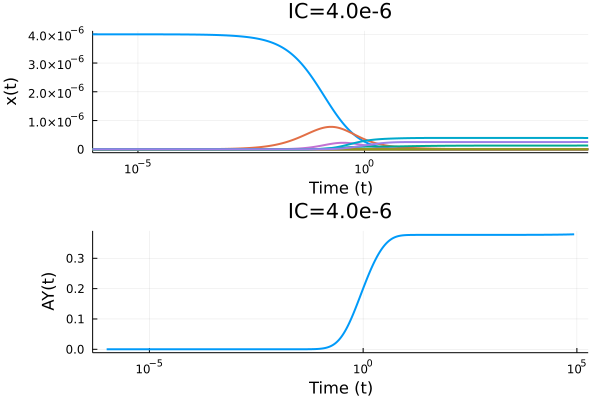

In [65]:
#---------------------------------
# --- IC vs AY curve DEBUGGING ---
#---------------------------------

# LL -- AY 

# Plot TC + AY tc  

# fixed parameters
c0=1 # 1M
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
kd1 = 10^-12
kd2 = 10^-3

allICs = [4*10^-6, 10^-10, 10^-4]

x0Val=allICs[1];x0Val_str=round(x0Val, digits = 10)
paramvaluesList_1= x0Val, kOn, δ, Q, kd1, kd2
sol_IC_1 = StackedRings_EJD(paramvaluesList_1)
tc_p1=plot(sol_IC_1,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", legend=false ) # legend=false

timePts = sol_IC_1.t; allSols = sol_IC_1.u; # list of all solutions 
# plot AY tc 
totPts = length(timePts); #print("Time points: ", totPts)
list_AY=[]; n=6 
XT = x0Val
for tp_i = 1:totPts
    slntEnd_pre = allSols[tp_i,:]; # println("prevec: ", slntEnd_pre)
    slntEnd = slntEnd_pre[1]; #println("Sln: ", slntEnd); println("-----")
    # --- calculate Xn = X12 ---
    Xn = slntEnd[12]; #println("Xn: ", Xn)
    # --- calculate Yn ---
    Yn = n*Xn/XT; # add this to the AY list
    push!(list_AY, Yn)
end 

tc_p1_ay=plot(timePts,list_AY,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="AY(t)", legend=false ) # legend=false


print("done")


plot(tc_p1, tc_p1_ay, layout=(2,1))


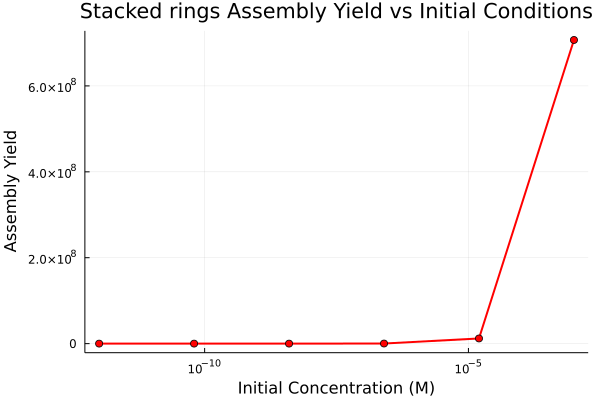

Red done!


In [19]:
#-------------------------------
# --- IC vs AY curve ---
#-------------------------------

# IC vs Ay --- LL 

# fixed parameters
c0=1 # 1M
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 

nICpts=6;minDeg=-12; maxDeg=-3

# --- change these to generate highlighted curves --- 
# - red curve -
kd1 = 10^-12 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-3 #between ring (intra)
allAYvsIC_red = calcAYvsIC(nICpts,minDeg, maxDeg)
println("Red done!")

allICs= allAYvsIC_red[1]; AYvals=allAYvsIC_red[2]

mycolors = [:red :green :orange :blue :purple]
p3_curve=plot(allICs,AYvals,linewidth=2, linecolor=:match, markershape=:circle, color = mycolors,title="Stacked rings Assembly Yield vs Initial Conditions",xaxis = ("Initial Concentration (M)",:log ),
         yaxis="Assembly Yield",legend=false ) # legend=false
display(p3_curve)

# plot the associated time course plots for each of these IC values 
# only do this for the 5 pts!

# get time courses for each point in the red curve here 
x0Val=allICs[1];x0Val_str=round(x0Val, digits = 10)
paramvaluesList_1= x0Val, kOn, δ, Q, kd1, kd2
sol_IC_1 = StackedRings_EJD(paramvaluesList_1)
tc_p1=plot(sol_IC_1,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", legend=false ) # legend=false

x0Val=allICs[2];x0Val_str=round(x0Val, digits = 10)
paramvaluesList_2= x0Val, kOn, δ, Q, kd1, kd2
sol_IC_2 = StackedRings_EJD(paramvaluesList_2)
tc_p2=plot(sol_IC_2,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", legend=false ) # legend=false

x0Val=allICs[3];x0Val_str=round(x0Val, digits = 10)
paramvaluesList_3= x0Val, kOn, δ, Q, kd1, kd2
sol_IC_3 = StackedRings_EJD(paramvaluesList_3)
tc_p3=plot(sol_IC_3,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", legend=false ) # legend=false

x0Val=allICs[4];x0Val_str=round(x0Val, digits = 10)
paramvaluesList_4= x0Val, kOn, δ, Q, kd1, kd2
sol_IC_4 = StackedRings_EJD(paramvaluesList_4)
tc_p4=plot(sol_IC_3,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", legend=false ) # legend=false

x0Val=allICs[5];x0Val_str=round(x0Val, digits = 10)
paramvaluesList_5= x0Val, kOn, δ, Q, kd1, kd2
sol_IC_5 = StackedRings_EJD(paramvaluesList_5)
tc_p5=plot(sol_IC_5,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", legend=false ) # legend=false

x0Val=allICs[6];x0Val_str=round(x0Val, digits = 10)
paramvaluesList_6= x0Val, kOn, δ, Q, kd1, kd2
sol_IC_6 = StackedRings_EJD(paramvaluesList_6)
tc_p6=plot(sol_IC_6,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", legend=false ) # legend=false

plot(tc_p1,tc_p2,tc_p3,tc_p4,tc_p5,tc_p6, layout = (3,2))

In [38]:
#----------------
#--- KD1 v AY ---
#----------------
# by PM

# fixed parameters
#-------------------------------
# --- parameter values here ---
#-------------------------------
c0=1 # 1M
#kd1 = 10^-3 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-8 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-8; # x0 M

#--- if kd1 remains defined globally uncomment
#kd1= nothing #clears kd1 value globally
#GC.gc() #runs garbage collector

function calcAYvsKD1(nKD1,minKD1, maxKD1) #number of steps, min, max
    # this function will calculate AY for different KD1 (inter) values at each time point but only for the x12 species 
    # nIKD1 = number of initial condition points to consider
    AllKD1s = []
    for i in LinRange(minKD1, maxKD1,nKD1)#start, stop, number of steps
        KD1=10^i
        push!(AllKD1s, KD1)
    end
    println(AllKD1s)

    # initialize lists to store
    AY_list = []
    # loop to solve AY for each KD 
    #println("before for loop is good")
    for KD1s in AllKD1s # loop through all the KD1 values
        kd1=KD1s
        println(kd1)
        println("-")
        paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
        sol = StackedRings_EJD(paramvaluesList);
        # calculate AY 
        ayVali = assemblyYield(sol); print(ayVali)
        println("*")
        # store value of AY 
        push!(AY_list, ayVali)
    end 
    
    return AllKD1s, AY_list
    
end


calcAYvsKD1(3,4,6)#number of steps, min, max


AY_list=[]
c0=1 # 1M
kd2 = 10^-6 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-8; # x0 M


Any[10000.0, 100000.0, 1.0e6]
10000.0
-
1.9598394302327463e-15*
100000.0
-
1.959069146748916e-21*
1.0e6
-
1.959975796723229e-27*


In [ ]:
#----------------------------
#---heap map KD1, KD2 v AY---
#----------------------------
#By PM

function KD1KD2vAY(KD1min, KD1max, KD1step, KD2min, KD2max, KD2step)
    AllKD1= []
    for i in LinRange(KD1min, KD1max, KD1step)
        KD1=10^i
        push!(AllKD1, KD1)
    end
    AllKD2= []
    for i in LinRange(KD2min, KD2max, KD2step)
        KD2=10^i
        push!(AllKD2, KD2)
    end
    AYvalues=[]
    for KD1 in AllKD1
        kd1=KD1
        for KD2 in AllKD2
            kd2=KD2
            paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
            sol = StackedRings_EJD(paramvaluesList);
            #solve AY values from solution and push to empty AY list and then figure out how to put it in a properly sized matrix depending on the size of the KD lists (aka use the KD list length as the dimensions)
    return AllKD1, AllKD2
end